In [1]:
group_number="15"

group="group"+group_number

import os
#os.chdir("../")
prelim_groups=open("../PhageGenomeAssembly/phage_by_group.txt")
phage_grp={}
for line in prelim_groups.readlines():
    line=line.rstrip("\n")
    vec=line.split("\t")
    phage_grp[vec[0]]=vec[1]
groups=list(phage_grp.values())
unique=[]
for value in groups:
    if value not in unique:
        unique.append(value)
grouplist=[]
for value in phage_grp.keys():
    if phage_grp.get(value)=='CNSv2.0:'+group_number:
        grouplist.append(value)
print(grouplist)

['2.092.O.', '1.011.O.', '1.141.A.', '1.095.O.', '1.107.B.', '1.069.O.', '1.008.O.', '1.102.O.', '1.107.C.', '1.080.O.', '1.062.O.', '1.043.O.', '1.249.B.', '1.249.A.', '1.020.O.', '1.048.O.', '1.057.O.', '1.125.O.', '1.044.O.', '1.107.A.', '1.040.O.']


In [2]:
from Bio.SeqUtils import GC
from pyfaidx import Fasta

out="phage"

for p in grouplist:
    genome=Fasta("./genomes/"+p+"final.fasta")
    for s in genome:
        out+=p+"\t"+str(GC(str(s)))+"\n"

In [3]:
prelim_groups=open("../PhageGenomeAssembly/phage_by_group.txt").readlines()

phage_info="name\tgroup\tGC_content\tlength\tgroup15\n"

for line in prelim_groups:
    p=line.split("\t")[0]
    group=line.split("\t")[1]
    if "15" in group:
        group15="group15"
    else:
        group15="other"
    genome_name="./genomes/"+p+"final.fasta"
    if os.path.exists(genome_name):
        genome=Fasta("./genomes/"+p+"final.fasta")
        for s in genome:
            gc=GC(str(s))
            length=len(str(s))
            phage_info+=p+"\t"+group.replace("\n","")+"\t"+str(gc)+"\t"+str(length)+"\t"+group15+"\n"
print(phage_info[1:100])

ame	group	GC_content	length	group15
1.003.O.	CNSv2.0:1	42.8421379294	41891	other
1.004.O.	CNSv2.0:1


In [5]:
%load_ext rpy2.ipython
%R library(ggplot2); library(dplyr); library(magrittr)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


/Users/jmb/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/jmb/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/jmb/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)


array(['magrittr', 'dplyr', 'ggplot2', 'tools', 'stats', 'graphics',
       'grDevices', 'utils', 'datasets', 'methods', 'base'], 
      dtype='|S9')

In [6]:
%%R -i phage_info

to_load<-textConnection(phage_info)
pi<-read.table(to_load, header=TRUE, sep="\t")

head(pi)

      name      group GC_content length group15
1 1.003.O.  CNSv2.0:1   42.84214  41891   other
2 1.004.O. CNSv2.0:14   44.98365  42511   other
3 1.005.O.  CNSv2.0:7   43.96135  50301   other
4 1.007.O.  CNSv2.0:1   42.84583  49244   other
5 1.008.O. CNSv2.0:15   43.33113  10579 group15
6 1.009.O.  CNSv2.0:7   57.69187  44443   other


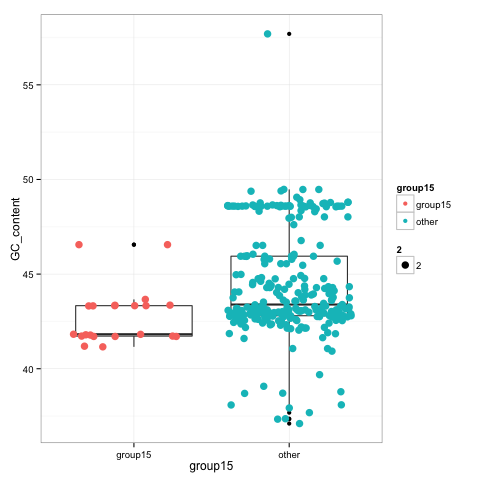

In [7]:
%%R
ggplot(pi, aes(group15, GC_content))+geom_boxplot()+geom_jitter(aes(color=group15, size=2))+theme_bw()

In [2]:
import os
import shutil

os.mkdir("./10kb_phages/")
os.mkdir("./10kb_phages/genomes/")
os.mkdir("./10kb_phages/prodigal/")
os.mkdir("./10kb_phages/prelim_annotation/")
os.mkdir("./10kb_phages/fna/")
os.mkdir("./10kb_phages/protein/")

group15=['2.092.O.', '1.011.O.', '1.141.A.', '1.095.O.', '1.107.B.', '1.069.O.', 
         '1.008.O.', '1.102.O.', '1.107.C.', '1.080.O.', '1.062.O.', '1.043.O.', 
         '1.249.B.', '1.249.A.', '1.020.O.', '1.048.O.', '1.057.O.', '1.125.O.', 
         '1.044.O.', '1.107.A.', '1.040.O.']

for phage in group15:
    genome="/nobackup1/jbrown/annotation/genomes/"+phage+"final.fasta"
    prod="/nobackup1/jbrown/annotation/genes/"+phage+"gene"
    gff3="/nobackup1/jbrown/annotation/gff3/"+phage+"cds.gff3"
    fna="/nobackup1/jbrown/annotation/fna/"+phage+"fna"
    protein="/nobackup1/jbrown/annotation/protein/"+phage+"protein"
    
    shutil.copyfile(genome, "./10kb_phages/genomes/")
    shutil.copyfile(prod, "./10kb_phages/prodigal/")
    shutil.copyfile(gff3, "./10kb_phages/prelim_annotation/")
    shutil.copyfile(fna, "./10kb_phages/fna/")
    shutil.copyfile(protein, "./10kb_phages/protein/")

['2.092.O.', '1.011.O.', '1.141.A.', '1.095.O.', '1.107.B.', '1.069.O.', '1.008.O.', '1.102.O.', '1.107.C.', '1.080.O.', '1.062.O.', '1.043.O.', '1.249.B.', '1.249.A.', '1.020.O.', '1.048.O.', '1.057.O.', '1.125.O.', '1.044.O.', '1.107.A.', '1.040.O.']
